# Exercise Nine: Numbers
This week, I explored the GSS dataset introduced in the "Social Stats" exercise.  The challenge and journey were to use the demo introduced and text to help guide the process. In the beginning, I experimented with areas to explore and the year and fell into the space below, which may even be changed when you view do to the ongoing experimentation. (three or more new variables explored - 'race','relig','marital', 'agewed', 'divorce).  

My workflow included:

Importing the current version of the file (available for download at the link above) and isolating the columns of interest-based on the variables I chose to include.

- Using the variable navigator provided by GSS, determine the years applicable and narrow your dataset accordingly.
- Visualize at least two quantitative relationships or patterns: these might include connections between clear numerical values, such as age and income,
  or more complex visualizations based on boolean data (for example, our "yes" and "no" to reading fiction.)
- Group the data using at least two different divisions to spot exciting trends and plot at least one variance across a group (refer to our example of 
  happiness among fiction readers as a starting point.

For a bonus challenge, I attempted running another analysis using an advanced method such as summary statistics or cross-tabulation.


## Stage One: Imports and Narrows by Column and Year
I imported the current version of the file (GSS7218_R1.dta) and isolated the columns of interest-based on the variables of the GSS survey data set results which are best received in the .dta over .stata (Karsdorp, Kestemont, Riddell 173). Also, it is essential to note that the "Git Ignore" option was used toward the huge .dta file to avoid any issues of stalling the process in this week's assignment and Visual Studio.  Two years were adjusted, including setting up comparables between the past 1972 and a more recent time 2016, which helped set the stage.



In [331]:
import pandas as pd

# we restrict this (very large) dataset to the variables of interest
columns = ['id', 'year', 'age', 'sex', 'race','relig','marital', 'agewed', 'divorce']
df = pd.read_stata("GSS7218_R1.dta", columns=columns)

# further limit dataset to the years we are interested in
df = df.loc[df['year'].isin({1972, 2016})]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race       relig        marital agewed  \
0         1  1972  23.0  female  white      jewish  NEVER MARRIED    NaN   
1         2  1972  70.0    male  white    catholic        married   21.0   
2         3  1972  48.0  female  white  protestant        married   20.0   
3         4  1972  27.0  female  white       other        married   24.0   
4         5  1972  61.0  female  white  protestant        married   22.0   
...     ...   ...   ...     ...    ...         ...            ...    ...   
62461  2863  2016  57.0  female  white  protestant        married    NaN   
62462  2864  2016  77.0    male  white  protestant        widowed    NaN   
62463  2865  2016  87.0  female  white  protestant        married    NaN   
62464  2866  2016  55.0  female  white    catholic        married    NaN   
62465  2867  2016  72.0    male  white        none        married    NaN   

      divorce  
0         NaN  
1          no  
2        

In an attempt to help limit the dataset to exclude records from subjects who didn't answer the survey was enlisted to clean the process. Initially, I attempted to remove subjects with loss of value for 'age,' but experimented and enhanced the process using the discovered component of wed age, 'agewed.'

In [292]:

df = df.loc[df['marital'].notna()]

df = df.loc[df['agewed'].notna()]
print(df.head)

<bound method NDFrame.head of         id  year   age     sex   race       relig   marital agewed divorce
1        2  1972  70.0    male  white    catholic   married   21.0      no
2        3  1972  48.0  female  white  protestant   married   20.0      no
3        4  1972  27.0  female  white       other   married   24.0      no
4        5  1972  61.0  female  white  protestant   married   22.0      no
6        7  1972  28.0    male  white    catholic  divorced   22.0     NaN
...    ...   ...   ...     ...    ...         ...       ...    ...     ...
1608  1609  1972  69.0  female  white  protestant   married   17.0      no
1609  1610  1972  74.0  female  white  protestant   widowed   18.0      no
1610  1611  1972  35.0    male  white    catholic   married   18.0      no
1611  1612  1972  22.0    male  white       other   married   21.0      no
1612  1613  1972  35.0    male  white  protestant   married   24.0     yes

[1395 rows x 9 columns]>


## Stage Two: Visualize Two Quantitative Aspects of the Data

Enhancing the thoughts toward visualization, I experimented with two opposing quantitative relationships to enable patterns to grow. First, marriage and marital age were used to help draw in connections between the known numerical values, 'agewed' and marital status 'marital.' Secondly, bringing more zest to the journey and exploration was the complexity toward visualizing with the use of "boolean data" using, in this case, the explanation of questioning toward an answer of "yes" and "no" toward the 'divorce' space direction.



### #1
With the use of the variable navigator provided by GSS, this choice with the use of 'agewed' was able to determine the years applicable to the interest and enable a way to narrow the dataset nicely while locating a data set 'mean' (22.1498) in 'agewed' age.  A workable quantitative prospect to explore that helped avoid the issue in the demo "df = df.replace()" need. And with the pursuit of "The second widely used summary statistic is the median" (Karsdorp, Kestemont, Riddell 177), which carries on the median (middle) value.


22.149820788530466


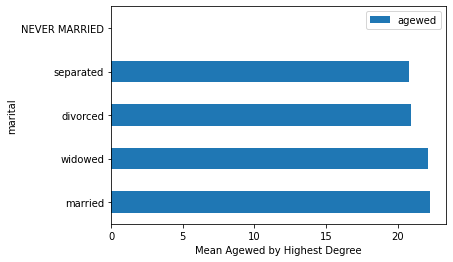

In [293]:

df['agewed'] = pd.to_numeric(df['agewed'])
print(df['agewed'].mean())

import matplotlib.pyplot as plt
df.groupby('marital')['agewed'].mean().plot(kind='barh')
plt.xlabel('Mean Agewed by Highest Degree')
plt.legend();

### #2
And for symbolic reference with alternative visual, the use of the negative component of marriage 'divorce' was used to create a pie chard semblance counter with "performance_counts = df['divorce'].value_counts()."  Allowing for the reference exploration toward the use of "Yes" vs. "No" to help counteract the research exploration of the data.

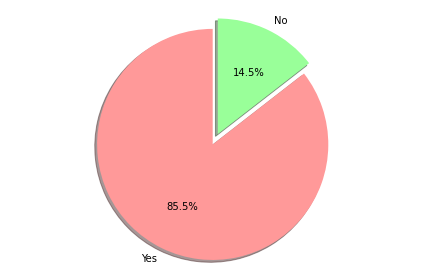

In [296]:

performance_counts = df['divorce'].value_counts()
labels=["Yes","No"]
colors=["#ff9999","#99ff99"]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(performance_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Stage Three: Use Groupby to Spot Additional Trends
The use of "Groupby" expanded the process and service of code beyond what I intended.  Religion areas of focus brought in the use of data toward 'age' representation in the organizational aspects. Here "exhibition_religion" with the "df.groupby" focus of 'relig' and 'age' showed value.



In [312]:

exhibition_religion = df.groupby('relig')['age'].value_counts()
exhibition_religion

relig                               
protestant               30.0           29
                         49.0           28
                         45.0           27
                         60.0           24
                         29.0           23
                                        ..
INTER-NONDENOMINATIONAL  41.0            0
                         40.0            0
                         39.0            0
                         38.0            0
                         89 OR OLDER     0
Name: age, Length: 936, dtype: int64

Furthermore, even though some of the areas of focus lost value, the upper use of "Groupby" within "Protestant" to "Jewish" was realized and helped to expand the service of code beyond what initially was intended.  

In [318]:

exhibition_gender = df.groupby('divorce')['sex'].value_counts()
exhibition_gender

divorce        
yes      female     97
         male       85
no       male      539
         female    535
Name: sex, dtype: int64

Continued rouping and experimenting with data alternating use at times with opposing different divisions enabled value toward pinpointing hidden trends. Here 'divorce' and "marital' and even the introduction of 'relig' move a variance across a group of defined areas of data.

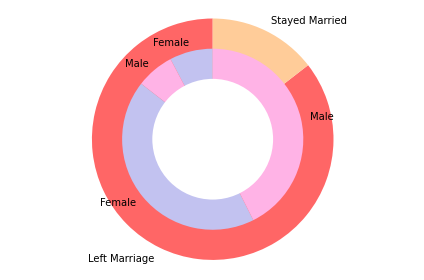

In [319]:

import matplotlib.pyplot as plt
 
# Data to plot
labels = ['Left Marriage','Stayed Married']
exhibition_counts = df['divorce'].value_counts()
labels_gender = ['Female','Male','Female','Male']
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(exhibition_counts, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(exhibition_gender, labels=labels_gender, colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

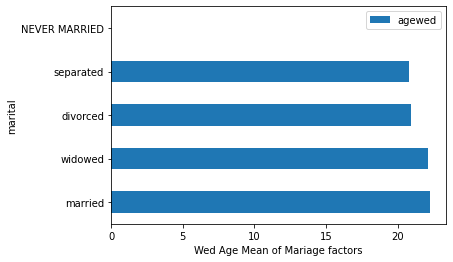

In [327]:
df['relig'] = df['relig'].replace(['No', 'Yes'], [0, 1])
df['divorce'] = df['divorce'].replace(['No', 'Yes'], [0, 1])
df.head()

df.groupby('marital')['agewed'].mean().plot(kind='barh')
plt.xlabel('Wed Age Mean of Mariage factors')
plt.legend();

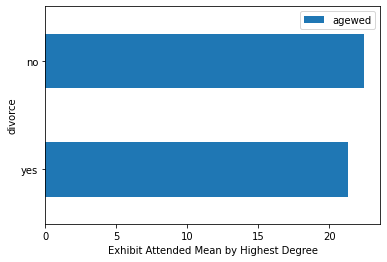

In [330]:
df.groupby('divorce')['agewed'].mean().plot(kind='barh')
plt.xlabel('Mariage Wins Stabilized Mean by Positive Data')
plt.legend();